In [2]:
import autograd
from autograd import numpy as np
import matplotlib.pyplot as plt

# 2.1 Introduction

- Example 2.1 Visual inspection of single-input functions for minima and maxima

Text(0, 0.5, '$g(w)$')

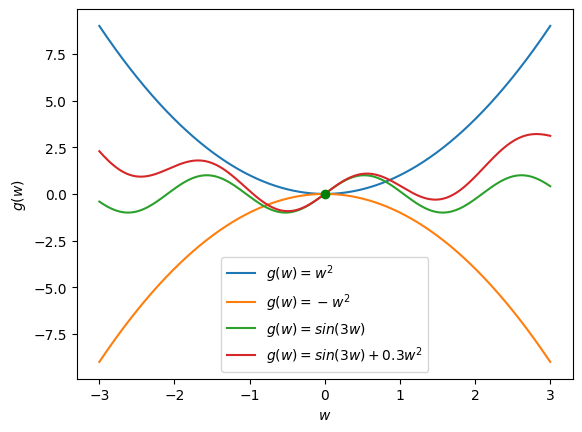

In [4]:
def g(w):
    return w * w

x = np.linspace(-3,3,3000)
y = g(x)
plt.plot(x,y,label='$g(w)=w^2$')
plt.plot(x,-y,label='$g(w)=-w^2$')
plt.plot(x,np.sin(3*x),label='$g(w)=sin(3w)$')
plt.plot(x,np.sin(3*x)+0.3*x*x,label='$g(w)=sin(3w)+0.3w^2$')
plt.plot(0,g(0),'o',color='g')
plt.legend()
plt.xlabel('$w$')
plt.ylabel('$g(w)$')

# 2.2 The Zero-Order Optimality Condition

- minimization problem  
    - global minimum
        - original form  
        ![image.png](https://raw.githubusercontent.com/Pokemongle/img_bed_0/main/img/20251109032139.png)
        - compact form  
        ![image.png](https://raw.githubusercontent.com/Pokemongle/img_bed_0/main/img/20251109032231.png)  
        ![image.png](https://raw.githubusercontent.com/Pokemongle/img_bed_0/main/img/20251109032625.png)  
    - *global maximum*  
        ![image.png](https://raw.githubusercontent.com/Pokemongle/img_bed_0/main/img/20251109032648.png)   
        ![image.png](https://raw.githubusercontent.com/Pokemongle/img_bed_0/main/img/20251109032654.png)  
    - *local minimum*  
        ![image.png](https://raw.githubusercontent.com/Pokemongle/img_bed_0/main/img/20251109032701.png)  
- Zero-Order  
    only defined by funtion value itself



# 2.3 Global Optimization Methods

- method  
    large number of input points -> the point that provides the lowest *function value*
- two approaches
    - uniform sampling 
    - random sampling  
    
![image.png](https://raw.githubusercontent.com/Pokemongle/img_bed_0/main/img/20251109041147.png)

- Example 2.2 Minimizing a quadratic function

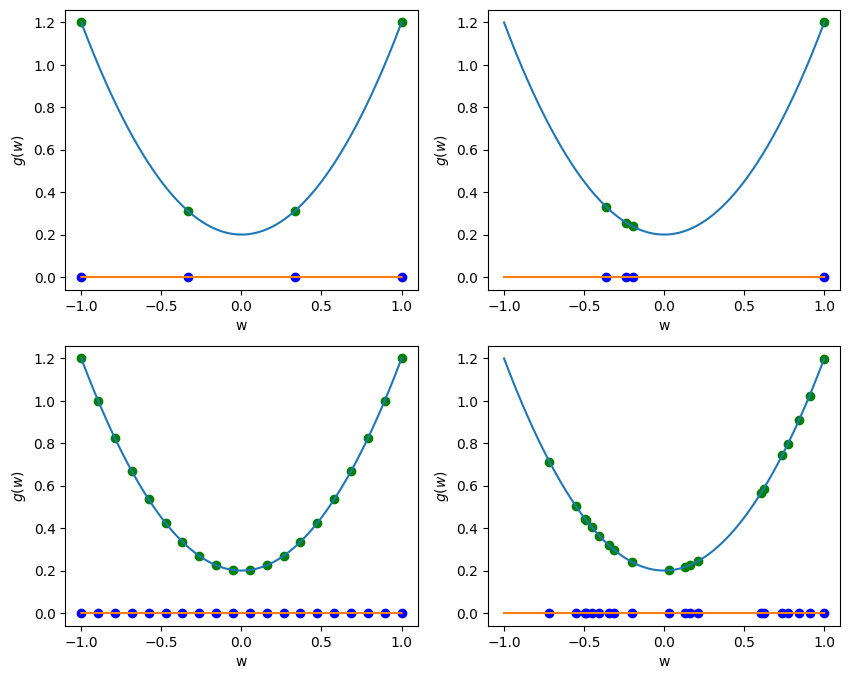

In [11]:
def g(w):
    return w * w + 0.2
def h(w):
    return np.zeros_like(w)

x = np.linspace(-1,1,2000)
x1 = np.linspace(-1,1,4)
x2 = np.sort(np.random.uniform(-1,1,4)) # np.sort np.random.uniform
x3 = np.linspace(-1,1,20)
x4 = np.sort(np.random.uniform(-1,1,20))
x_list=[x1,x2,x3,x4]
fig,axes=plt.subplots(2,2,figsize=(10,8)) # subplots
for i,ax in enumerate(axes.ravel()): # .ravel()
    ax.plot(x,g(x))
    ax.plot(x,h(x))
    ax.scatter(x_list[i],g(x_list[i]),marker='o',color='g')
    ax.scatter(x_list[i],h(x_list[i]),marker='o',color='b')
    ax.set_ylabel('$g(w)$') # ax.set_ylabel
    ax.set_xlabel('w')


# 2.4 Local Optimization Methods

- method  
    starting with a single input point -> refine it towards an *approximate* minimum point  
    ![image.png](https://raw.githubusercontent.com/Pokemongle/img_bed_0/main/img/20251114010508.png)  
    ![image.png](https://raw.githubusercontent.com/Pokemongle/img_bed_0/main/img/20251114010514.png)  
    ![image.png](https://raw.githubusercontent.com/Pokemongle/img_bed_0/main/img/20251114010522.png)  
- step size?  
    - not too big, not too small, adjustable
    - **learning rate**  
    ![image.png](https://raw.githubusercontent.com/Pokemongle/img_bed_0/main/img/20251114010535.png)
- how to set $\alpha$?


# 2.5 Random Search

- method  
    find $P\ \bold{d}^p$  
    ![image.png](https://raw.githubusercontent.com/Pokemongle/img_bed_0/main/img/20251114011607.png)  
    if $g(w^k)<g(w^{k-1})$, step forward  
    if not, try new batch of $\bold{d^p}$  
- Control the step length  
    normalize step size to unit length  
    ![image.png](https://raw.githubusercontent.com/Pokemongle/img_bed_0/main/img/20251114012042.png)  
    ![image.png](https://raw.githubusercontent.com/Pokemongle/img_bed_0/main/img/20251114012115.png)
    - diminishing steplength rules  
    ![image.png](https://raw.githubusercontent.com/Pokemongle/img_bed_0/main/img/20251114020701.png)
        - step size decrease
        - but still go through the whole space  
- limit of Random Research  
    dimension increases, probablity of finding the descending direction decreases

- Example 2.3 
$g(w_1,w_2)=w_1^2+w_2^2+2$, K=5, $\alpha$=1, P=1000

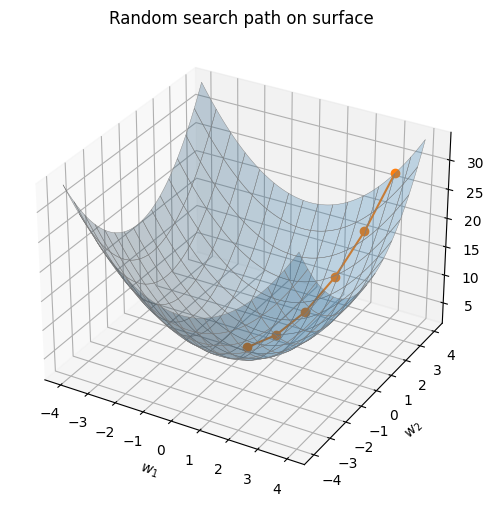

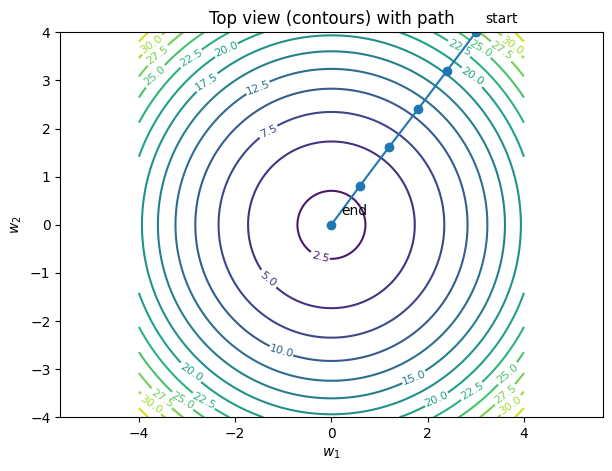

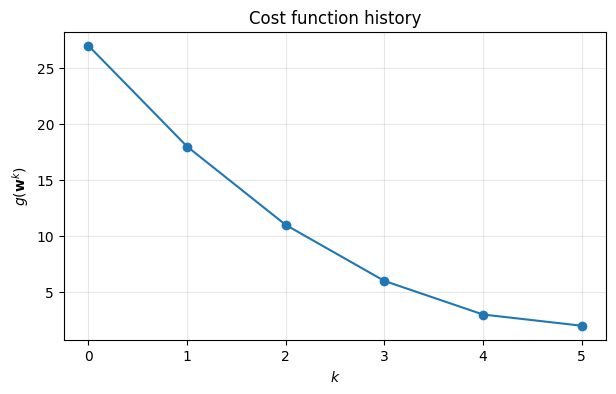

trajectory ws:
 [[ 3.00000000e+00  4.00000000e+00]
 [ 2.39982021e+00  3.20013488e+00]
 [ 1.79778182e+00  2.40166773e+00]
 [ 1.19013858e+00  1.60745762e+00]
 [ 5.89790549e-01  8.07718767e-01]
 [-1.33837778e-03  1.14168358e-03]]
g(w^k):
 [27.         18.00000025 11.00002737  6.00034986  3.0002625   2.00000309]


In [ ]:
# Random local search for Example 2.3
# g(w1, w2) = w1^2 + w2^2 + 2
# K steps, step length alpha, at each step pick best among P random directions.

import numpy as np
import matplotlib.pyplot as plt

# --------- config ----------
np.random.seed(42)   # 复现实验
K = 5                # 步数
alpha = 1.0          # 步长
P = 1000             # 每步随机方向数
w0 = np.array([3.0, 4.0])  # 初始点
# ---------------------------

def g(w):
    """target function g(w1,w2) = w1^2 + w2^2 + 2"""
    return w[0]**2 + w[1]**2 + 2.0

def random_unit_directions(P, dim=2):
    """生成 P 个 dim 维随机单位向量"""
    v = np.random.randn(P, dim)
    v /= np.linalg.norm(v, axis=1, keepdims=True) # linear algebra keepdims
    return v

# ---- run random search ----
w = w0.copy()
ws = [w.copy()]       # 轨迹点
gs = [g(w)]           # 代价历史

for k in range(K):
    dirs = random_unit_directions(P, dim=2)
    candidates = w - alpha * dirs             # broadcasting
    vals = np.sum(candidates**2, axis=1) + 2  # g(candidates)
    best_idx = np.argmin(vals)
    w = candidates[best_idx]
    ws.append(w.copy())
    gs.append(vals[best_idx])

ws = np.array(ws)
ks = np.arange(len(gs))

# ---- draw: 3D surface with path ----
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')

x = np.linspace(-4, 4, 120)
y = np.linspace(-4, 4, 120)
X, Y = np.meshgrid(x, y)
Z = X**2 + Y**2 + 2.0

ax.plot_surface(X, Y, Z, rstride=8, cstride=8, edgecolor='gray', linewidth=0.3, alpha=0.25)
ax.plot(ws[:,0], ws[:,1], np.array([g(p) for p in ws]), marker='o')
ax.set_xlabel(r'$w_1$'); ax.set_ylabel(r'$w_2$'); ax.set_zlabel(r'$g(\mathbf{w})$')
ax.set_title('Random search path on surface')
plt.show()

# ---- draw: contour (top view) with path ----
plt.figure(figsize=(7,5))
CS = plt.contour(X, Y, Z, levels=12)
plt.clabel(CS, inline=True, fontsize=8)
plt.plot(ws[:,0], ws[:,1], marker='o')
plt.annotate('start', (ws[0,0], ws[0,1]), xytext=(ws[0,0]+0.2, ws[0,1]+0.2))
plt.annotate('end', (ws[-1,0], ws[-1,1]), xytext=(ws[-1,0]+0.2, ws[-1,1]+0.2))
plt.xlabel(r'$w_1$'); plt.ylabel(r'$w_2$')
plt.title('Top view (contours) with path')
plt.axis('equal')
plt.show()

# ---- draw: cost function history ----
plt.figure(figsize=(7,4))
plt.plot(ks, gs, marker='o')
plt.xlabel(r'$k$'); plt.ylabel(r'$g(\mathbf{w}^k)$')
plt.title('Cost function history')
plt.grid(True, alpha=0.3)
plt.show()

print("trajectory ws:\n", ws)
print("g(w^k):\n", np.array(gs))


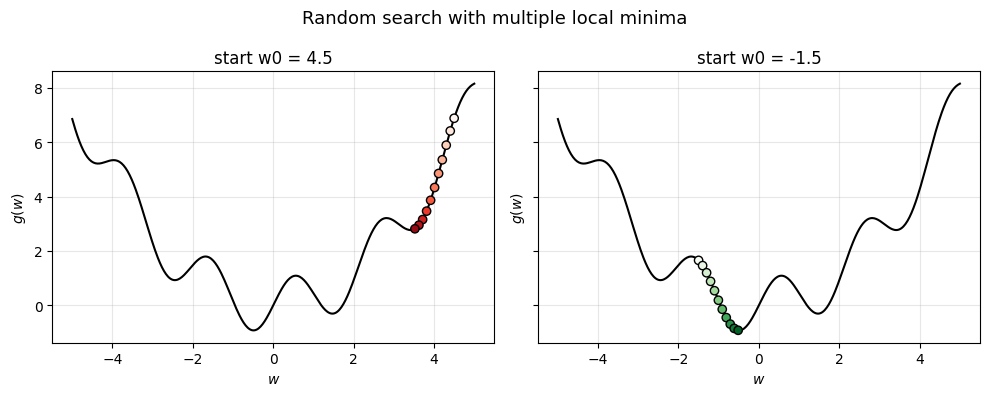

In [ ]:
# Example 2.4 Minimizing a function with multiple local minima
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

# ---- Define function ----
def g(w):
    return np.sin(3*w) + 0.3*w**2

# ---- Random search function ----
def random_search_1d(w0, alpha=0.1, K=10, P=100):
    w = w0
    ws = [w]
    gs = [g(w)]
    for k in range(K):
        dirs = np.random.uniform(-1, 1, size=P)  # 1D 随机方向
        candidates = w - alpha * dirs
        vals = g(candidates)
        best_idx = np.argmin(vals)
        w = candidates[best_idx]
        ws.append(w)
        gs.append(vals[best_idx])
    return np.array(ws), np.array(gs)

# ---- Run two searches ----
runs = [
    {"w0": 4.5, "color": "Reds"},
    {"w0": -1.5, "color": "Greens"}
]

x = np.linspace(-5, 5, 400)
y = g(x)

fig, axes = plt.subplots(1, 2, figsize=(10, 4), sharey=True)

for ax, run in zip(axes, runs):
    ws, gs = random_search_1d(run["w0"])
    cmap = plt.get_cmap(run["color"])
    colors = [cmap(i / len(ws)) for i in range(len(ws))]
    ax.plot(x, y, 'k', lw=1.5)
    ax.scatter(ws, gs, c=colors, edgecolor='k', zorder=3)
    ax.set_xlabel(r"$w$")
    ax.set_ylabel(r"$g(w)$")
    ax.set_title(f"start w0 = {run['w0']}")
    ax.grid(alpha=0.3)

plt.suptitle("Random search with multiple local minima", fontsize=13)
plt.tight_layout()
plt.show()


# 2.6 Coordinate Search and Descent

- method  
    restrict the set of search direction to the coordinate axes of the input space  
    one parameter at a time  
    try 2N(N=2) directions at 1 iteration  
    ![image.png](https://raw.githubusercontent.com/Pokemongle/img_bed_0/main/img/20251114120312.png)
    
